## A Random Walk Class


In [19]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D

In [20]:
class Random_walk:

    color_sequence = [ '#9467bd','#ff7f0e', '#ffbb78', '#2ca02c','#aec7e8',
                      '#98df8a', '#d62728', '#c5b0d5','#1f77b4', '#ff9896',
                      '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                      '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']
    
    def __init__(self, x0 = 0, y0=0, z0=0):
        self.x0 = x0
        self.y0 = y0
        self.z0 = z0
        self.x = x0
        self.y = y0 
        self.z = z0
        self.pos_x = [x0]
        self.pos_y = [y0]
        self.pos_z = [z0]
        
    
    def step_forward(self):
        random_unit_list = [-1,0,1]
        self.x = self.x + random.choice(random_unit_list)
        self.y = self.y + random.choice(random_unit_list)
        self.z = self.z + random.choice(random_unit_list)
        self.pos_x.append(self.x)
        self.pos_y.append(self.y)
        self.pos_z.append(self.z)
        
    def NSOE(self):
        # Note: Compatible only with the 2D plot
        random_direction_list = [(1,0),(-1,0),(0,1),(0,-1)]
        temp = random.choice(random_direction_list)
        self.x = self.x + temp[0]
        self.y = self.y + temp[1]
        self.pos_x.append(self.x)
        self.pos_y.append(self.y)
        
    def NSOE_lim(self):
        # Note: Compatible only with the 2D plot
        # Unable to repeat the same direction two times in a row
        random_direction_list = [(1,0),(-1,0),(0,1),(0,-1)]
        temp = random.choice(random_direction_list)
        if len(self.pos_x) == 1:
            self.x = self.x + temp[0]
            self.y = self.y + temp[1]
            self.pos_x.append(self.x)
            self.pos_y.append(self.y)
        else:
            x_prev = self.x - self.pos_x[-2]
            y_prev = self.y - self.pos_y[-2]
            if (x_prev == temp[0] and y_prev == temp[1]):
                random_direction_list.remove(temp)
                temp2 = random.choice(random_direction_list)
                self.x = self.x + temp2[0]
                self.y = self.y + temp2[1]
                self.pos_x.append(self.x)
                self.pos_y.append(self.y)             
            else:
                self.x = self.x + temp[0]
                self.y = self.y + temp[1]
                self.pos_x.append(self.x)
                self.pos_y.append(self.y)
        
    def iterator(self, num_iter=5*10**3):
        self.pos_x = [self.x0]
        self.pos_y = [self.y0]
        self.pos_z = [self.z0]   
        for t in range(0,num_iter):
            self.step_forward()
        return
    
    def plot2D_random(self):
        plt.figure(figsize=(10,10))
        plt.plot(self.pos_x,self.pos_y,'-')
        plt.plot(self.x0,self.y0,'o',c='red',label='Starting Point')
        plt.plot(self.x,self.y,'o',c='orange',label='You are here')
        plt.grid('on')
        plt.legend(loc='best')
        plt.show()
    
    def plot3D_random(self,n=1, num_iter=5*10**3):
        plt.figure(figsize=(10,10))
        ax = plt.axes(projection='3d')
        ax.scatter(self.x0,self.y0,self.z0, marker="o", c="red",label='Starting Point')
        for path in range(n):
            temp_color = random.choice(Random_walk.color_sequence)
            self.x = self.x0
            self.y = self.y0
            self.z = self.z0
            self.iterator(num_iter)
            ax.plot(self.pos_x,self.pos_y,self.pos_z,c=temp_color)
            ax.scatter(self.x,self.y,self.z, marker="o",c=temp_color,label=f'Path {path}')
        plt.legend(loc='best')
        plt.show()        
  

In [21]:
# ---Set seed for reproducibility---
#random.seed(123)  

# ---Number of iteration
num_steps = 25000

# Store 3 Randomi_walk object
test = Random_walk()
test2 = Random_walk()
test3 = Random_walk()

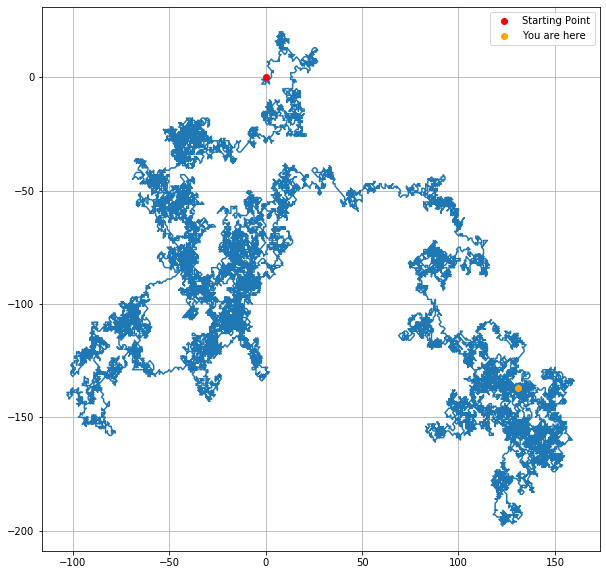

In [22]:
for t in range(0,num_steps):
    test.step_forward()

test.plot2D_random()

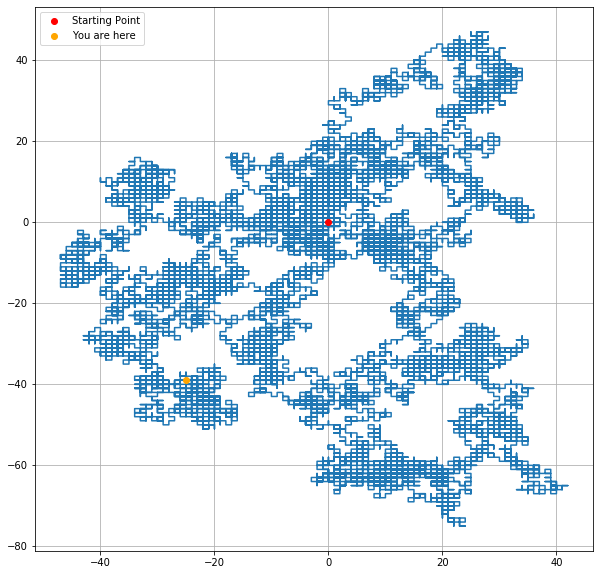

In [23]:
for t in range(0,num_steps):
    test2.NSOE_lim()
test2.plot2D_random()

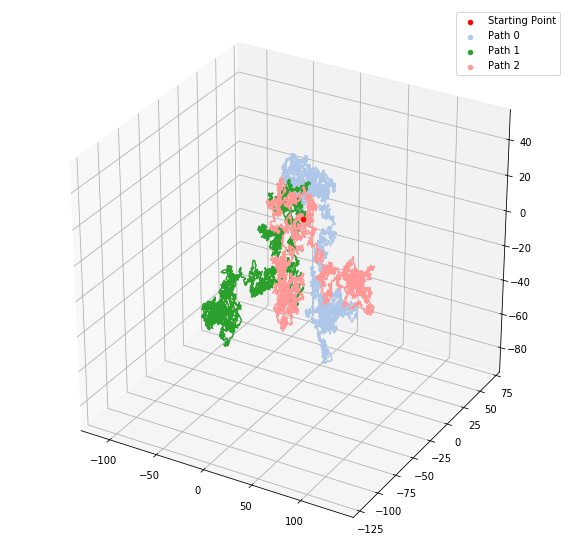

In [24]:
test3.plot3D_random(n=3)